# Uber Case Study

## Background: 
Uber Technologies, Inc. is an American multinational transportation network company based in San Francisco and has operations in over 785 metropolitan areas with over 110 million users worldwide. Ridesharing is a very volatile market and demand fluctuates wildly with time, place, weather, local events, etc. The key to being successful in this business is to be able to detect patterns in these fluctuations and cater to the demand at any given time. As a newly hired Data Scientist in Uber's New York Office, you have been given the task of extracting insights from data that will help the business grow. Good insights are actionable and make business sense.

## Objective: 
To extract actionable insights that will enable business growth in the market.

## Key Questions:
1. What are the different variables that influence pickups?
2. Which factor affects the pickups the most? What could be plausible reasons for that?
3. What are your recommendations to Uber management to capitalize on fluctuating demand?

## Data Description:

* pickup_dt: Date and time of the pick-up.
* borough: NYC's borough.
* pickups: Number of pickups for the period.
* spd: Wind speed in miles/hour.
* vsb: Visibility in miles to the nearest tenth.
* temp: Temperature in Fahrenheit.
* dewp: Dew point in Fahrenheit.
* slp: Sea level pressure.
* pcp01: 1-hour liquid precipitation.
* pcp06: 6-hour liquid precipitation.
* pcp24: 24-hour liquid precipitation.
* sd: Snow depth in inches.
* hday: Being a holiday (Y) or not (N).

### Import the necessary libraries - pandas, numpy, seaborn, matplotlib.pyplot

In [13]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load the dataset

In [15]:
data = pd.read_csv('Uber.csv')

In [4]:
# copying data to another varaible to avoid any changes to original data
df = data.copy()

### View the first few rows of the dataset

In [5]:
# looking at head (5 observations) 
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


**Observations**
* pickup_dt contains date and time of pickup 
* borough contains the name of the New York borough the pickup was made in
* pickups contain the number of pickups in the borough at the given time 
* All the weather related variables are numerical
* The variable holiday is a categorical variable

### Check the shape of the dataset

In [6]:
df.shape

(29101, 13)

* The dataset has 29,101 rows and 13 columns.

### Check the info()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


**Observations**
* All column have 29,101 observations except borough which has 26058 observations indicating that there are missing values in it
* Pickup_dt is read as 'object' data type but it should have data type - datetime
* borough and hday (holiday) should be  categorical variables

# Data Preprocessing

### Fixing the datatypes

In [8]:
# date time column should be converted to date time data type
# categorical column should be converted to categorical type 
# (It reduces the data space required to store the dataframe, 
# every class in the categorical column will be represented by a number under the hood.
# This is useful during model building)

df['pickup_dt'] = pd.to_datetime(df.pickup_dt)
df['borough'] = df.borough.astype('category')
df['hday'] = df.hday.astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  category      
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       29101 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(9), int64(1)
memory usage: 2.5 MB


* There are 10 numeric columns, 2 categorical columns and 1 datetime column

### Summary of the data

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pickups,29101.0,490.215903,995.649536,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,29101.0,47.669042,19.814969,2.0,32.0,46.0,64.500000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1017.817938,7.768796,991.4,1012.5,1018.2,1022.900000,1043.40
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


* There is a huge difference between the 3rd quartile and the maximum value for the number of pickups (pickups) and snow depth (sd) indicating there might be outliers to the right in these variables
* The temperature has a wide range indicating that data consists of entries from both winter as well as summer season

**By default the describe() function shows only the summary of numeric variables only. Let's check the summary of non-numeric variables.**  

In [11]:
df.describe(exclude='number').T

,count,unique,top,freq,first,last
pickup_dt,29101,4343,2015-06-16 15:00:00,7,2015-01-01 01:00:00,2015-06-30 23:00:00
borough,26058,6,Staten Island,4343,NaT,NaT
hday,29101,2,N,27980,NaT,NaT


**Observations**
* Pick up date have entries from 1-jan -2015 to 30-june-2015, this implies that we have 6 months data
* The variable 'borough' has 6 unique categories

**Let's check the count of each unique category in each of the categorical variables.**

In [12]:
#Making a list of all catrgorical variables 
cat_col=['borough', 'hday']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print('-'*50)

Staten Island    4343
Queens           4343
Manhattan        4343
EWR              4343
Brooklyn         4343
Bronx            4343
Name: borough, dtype: int64
--------------------------------------------------
N    27980
Y     1121
Name: hday, dtype: int64
--------------------------------------------------


* All the categories in the borough variable have an equal count
* The number of non-holiday observations is much more than holiday observations which make sense

### Feature Creation
### Extracting date parts from pickup date

In [13]:
# Extracting date parts from pickup date
df['start_year'] = df.pickup_dt.dt.year
df['start_month'] = df.pickup_dt.dt.month_name()
df['start_hour'] = df.pickup_dt.dt.hour
df['start_day'] = df.pickup_dt.dt.day
df['week_day'] = df.pickup_dt.dt.day_name()

In [14]:
# removing pickup date column as it will not be required for further analysis
df.drop('pickup_dt',axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   borough      26058 non-null  category
 1   pickups      29101 non-null  int64   
 2   spd          29101 non-null  float64 
 3   vsb          29101 non-null  float64 
 4   temp         29101 non-null  float64 
 5   dewp         29101 non-null  float64 
 6   slp          29101 non-null  float64 
 7   pcp01        29101 non-null  float64 
 8   pcp06        29101 non-null  float64 
 9   pcp24        29101 non-null  float64 
 10  sd           29101 non-null  float64 
 11  hday         29101 non-null  category
 12  start_year   29101 non-null  int64   
 13  start_month  29101 non-null  object  
 14  start_hour   29101 non-null  int64   
 15  start_day    29101 non-null  int64   
 16  week_day     29101 non-null  object  
dtypes: category(2), float64(9), int64(4), object(2)
memory usage: 3.4+ MB

### Fixing data type  of week day and start month

In [16]:
df['start_month'] = df.start_month.astype('category')
df['week_day'] = df.week_day.astype('category')

In [17]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
borough,26058,6,Staten Island,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickups,29101,NaN,NaN,NaN,490.216,995.65,0,1,54,449,7883
spd,29101,NaN,NaN,NaN,5.98492,3.69901,0,3,6,8,21
vsb,29101,NaN,NaN,NaN,8.81812,2.4429,0,9.1,10,10,10
temp,29101,NaN,NaN,NaN,47.669,19.815,2,32,46,64.5,89
dewp,29101,NaN,NaN,NaN,30.8231,21.2834,-16,14,30,50,73
slp,29101,NaN,NaN,NaN,1017.82,7.7688,991.4,1012.5,1018.2,1022.9,1043.4
pcp01,29101,NaN,NaN,NaN,0.00383015,0.0189331,0,0,0,0,0.28
pcp06,29101,NaN,NaN,NaN,0.0261287,0.0931253,0,0,0,0,1.24
pcp24,29101,NaN,NaN,NaN,0.0904644,0.219402,0,0,0,0.05,2.1


### Missing value treatment

In [18]:
# checking missing values
df.isna().sum()

borough        3043
pickups           0
spd               0
vsb               0
temp              0
dewp              0
slp               0
pcp01             0
pcp06             0
pcp24             0
sd                0
hday              0
start_year        0
start_month       0
start_hour        0
start_day         0
week_day          0
dtype: int64

* The variable 'borough' has 3043 missing values
* There are no missing values in other variables

In [19]:
# Checking the missing values further
df.borough.value_counts(normalize=True, dropna=False)

Staten Island    0.149239
Queens           0.149239
Manhattan        0.149239
EWR              0.149239
Brooklyn         0.149239
Bronx            0.149239
NaN              0.104567
Name: borough, dtype: float64

* All the 6 categories have the same percentage i.e. ~15%. There is no mode (or multiple modes) for this variable
* The percentage of missing values is close to the percentage of observations from other boroughs
* We can treat the missing values as a separate category for this variable 

In [20]:
# Replacing NaN with Unknown
df['borough'] = df['borough'].cat.add_categories('Unknown')
df['borough'].fillna('Unknown', inplace =True) 

In [21]:
df.borough.value_counts()

Staten Island    4343
Queens           4343
Manhattan        4343
EWR              4343
Brooklyn         4343
Bronx            4343
Unknown          3043
Name: borough, dtype: int64

In [22]:
df.isnull().sum()

borough        0
pickups        0
spd            0
vsb            0
temp           0
dewp           0
slp            0
pcp01          0
pcp06          0
pcp24          0
sd             0
hday           0
start_year     0
start_month    0
start_hour     0
start_day      0
week_day       0
dtype: int64

* There are no missing values in the data

# EDA

### Let us explore the numerical variables first

In [23]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.    
    
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## Observations on Pickups

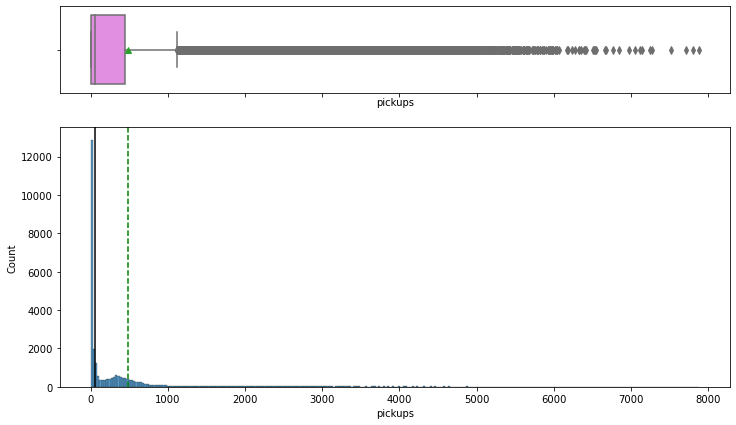

In [25]:
histogram_boxplot(df, 'pickups')

**Observations**
* The distribution of hourly pickups is highly right skewed
* Majority of the hourly pickups are close to 0
* Median pickups is equal to 0 but the mean is ~500 
* There are a lot of outliers in this variable. 
* While most hourly pickups are at lower end, we have observations where hourly pickups went as high as 8000

##  Observations on Visibility

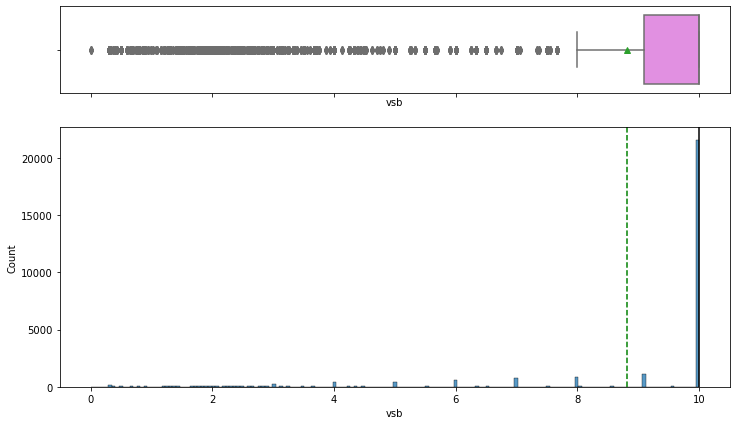

In [26]:
histogram_boxplot(df, 'vsb')

**Observations**
* visibility is left-skewed
* Both the mean and median are high, indicating that the visibility is good on most days
* There are, however, outliers towards the left, indicating that visibility is extremely low on some days.
* It will be interesting to see how visibility affects the Uber pickup frequency

## Observations on Temperature

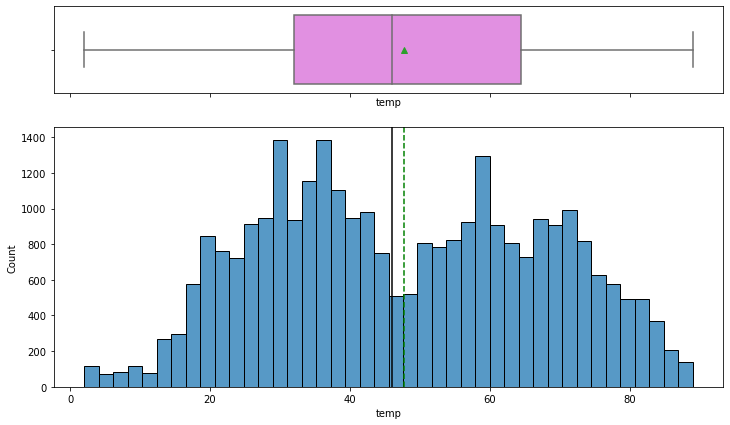

In [27]:
histogram_boxplot(df, 'temp')

**Observations**
* Temperature does not have any outliers.
* The distribution of temperature has two peaks (Bi-modal), one at around 35F and other at around 60F. The hump is greater at 35F (~1.5 C) indicating cold weather conditions.

## Observations on Dew point

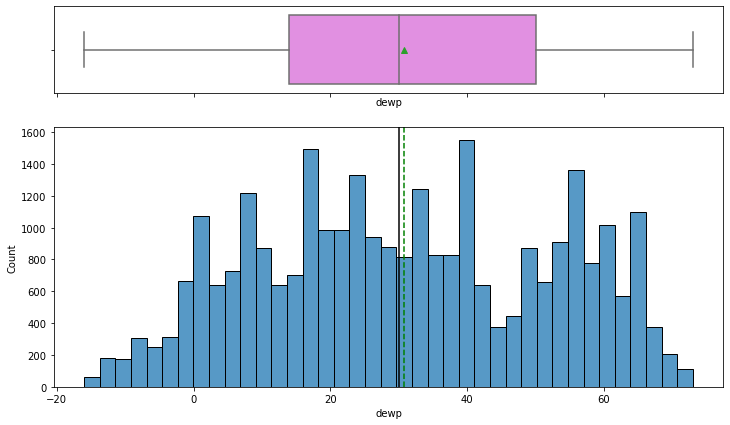

In [28]:
histogram_boxplot(df, 'dewp')

**Observations**
* There are no outliers for dew point either.
* The distribution is similar to that of temperature. It suggests possible correlation between the two variables.
* Dew point is an indication of humidity, which is correlated with temperature.

## Observations on Sea level pressure

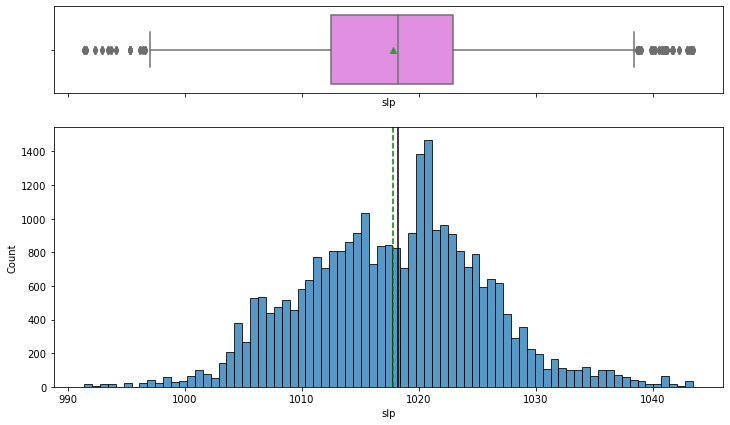

In [29]:
histogram_boxplot(df, 'slp')

**Observations**
* Sea level pressure distribution is close to normal.
* There are a few outliers on both the ends.

##  Observations on Liquid Precipitation (Rain)

**1 hour liquid precipitation**

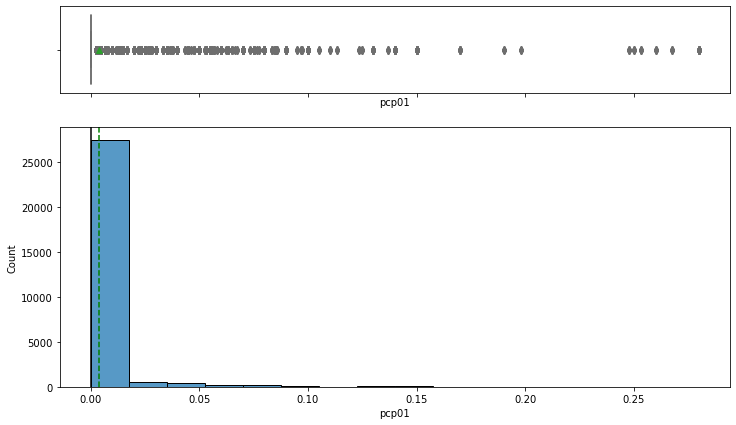

In [30]:
histogram_boxplot(df, 'pcp01')

**6 hour liquid precipitation**

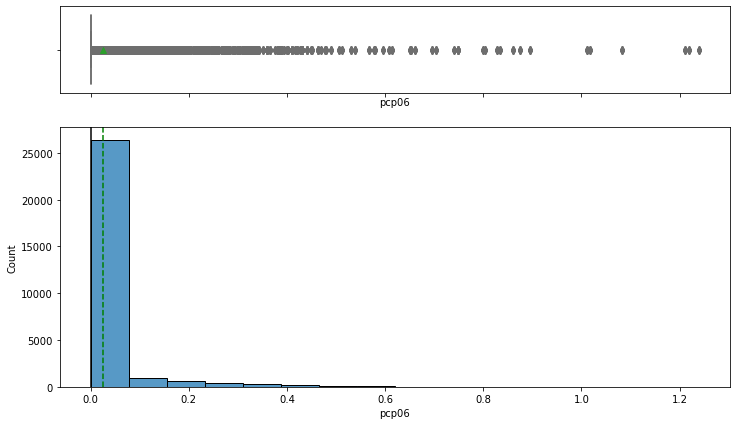

In [32]:
histogram_boxplot(df, 'pcp06')

**24 hour liquid precipitation**

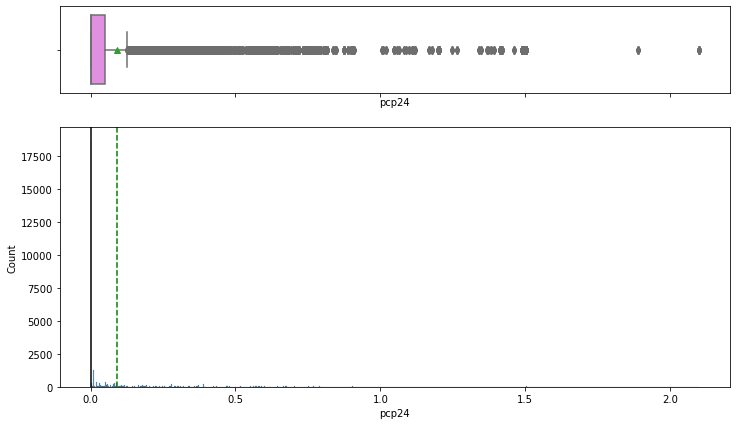

In [34]:
histogram_boxplot(df, 'pcp24')

**Observations**
* It rains on relatively fewer days in New York
* Most of the days are dry
* When it rains, and sometimes when it rains heavily, we get outliers.

## Observations on Snow Depth

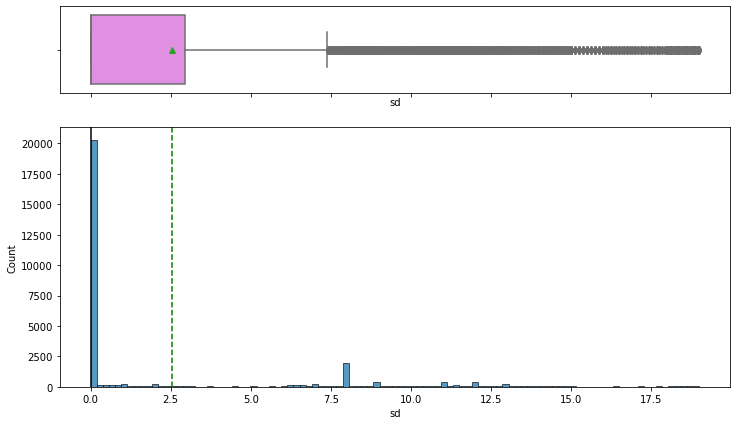

In [35]:
histogram_boxplot(df, 'sd')

**Observations**
* We can observe that there is snowfall in the time period that we are analyzing.
* There are outliers in this data.
* We will have to see how snowfall affects pickups. We know that very few people are likely to get out if it is snowing heavily, so our pickups would likely decrease when it snows. 

## Let's explore the categorical variables now

In [38]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Observations on holiday

<Figure size 720x504 with 0 Axes>

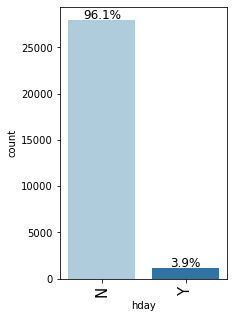

In [43]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'hday', perc=True)

**Observations**
* Only 3.9% of days were holidays in the period that we are analyzing

## Observations on borough

<Figure size 1080x504 with 0 Axes>

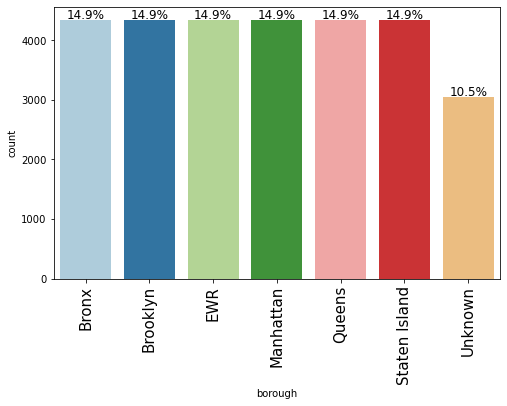

In [45]:
plt.figure(figsize=(15,7))
labeled_barplot(df, 'borough', perc=True)

* The observations are uniformly distributed across the boroughs except the observations that had NaN values and were attributed to Unknown borough.

## Bivariate Analysis

**Plot bivariate charts between variables to understand their interaction with each other.**

## Correlation

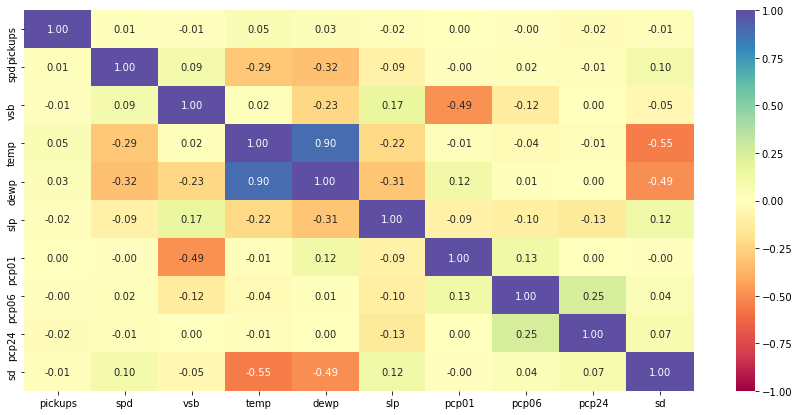

In [46]:
# Check for correlation among numerical variables
num_var = ['pickups','spd','vsb','temp','dewp', 'slp','pcp01', 'pcp06', 'pcp24', 'sd']

corr = df[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

**Observations**
* As expected, temperature shows high correlation with dew point
* Visibility is negatively correlated with precipitation. If the rains are high during the hour, visibility is low. This is aligned with our intuitive understanding. 
* Snow depth of course would be negatively correlated with temperature.
* Wind speed and sea level pressure are negatively correlated with temperature. 
* It is important to note that correlation does not imply causation.
* There does not seem to be a strong relationship between number of pickups and weather stats. 

### Bivariate Scatter Plots

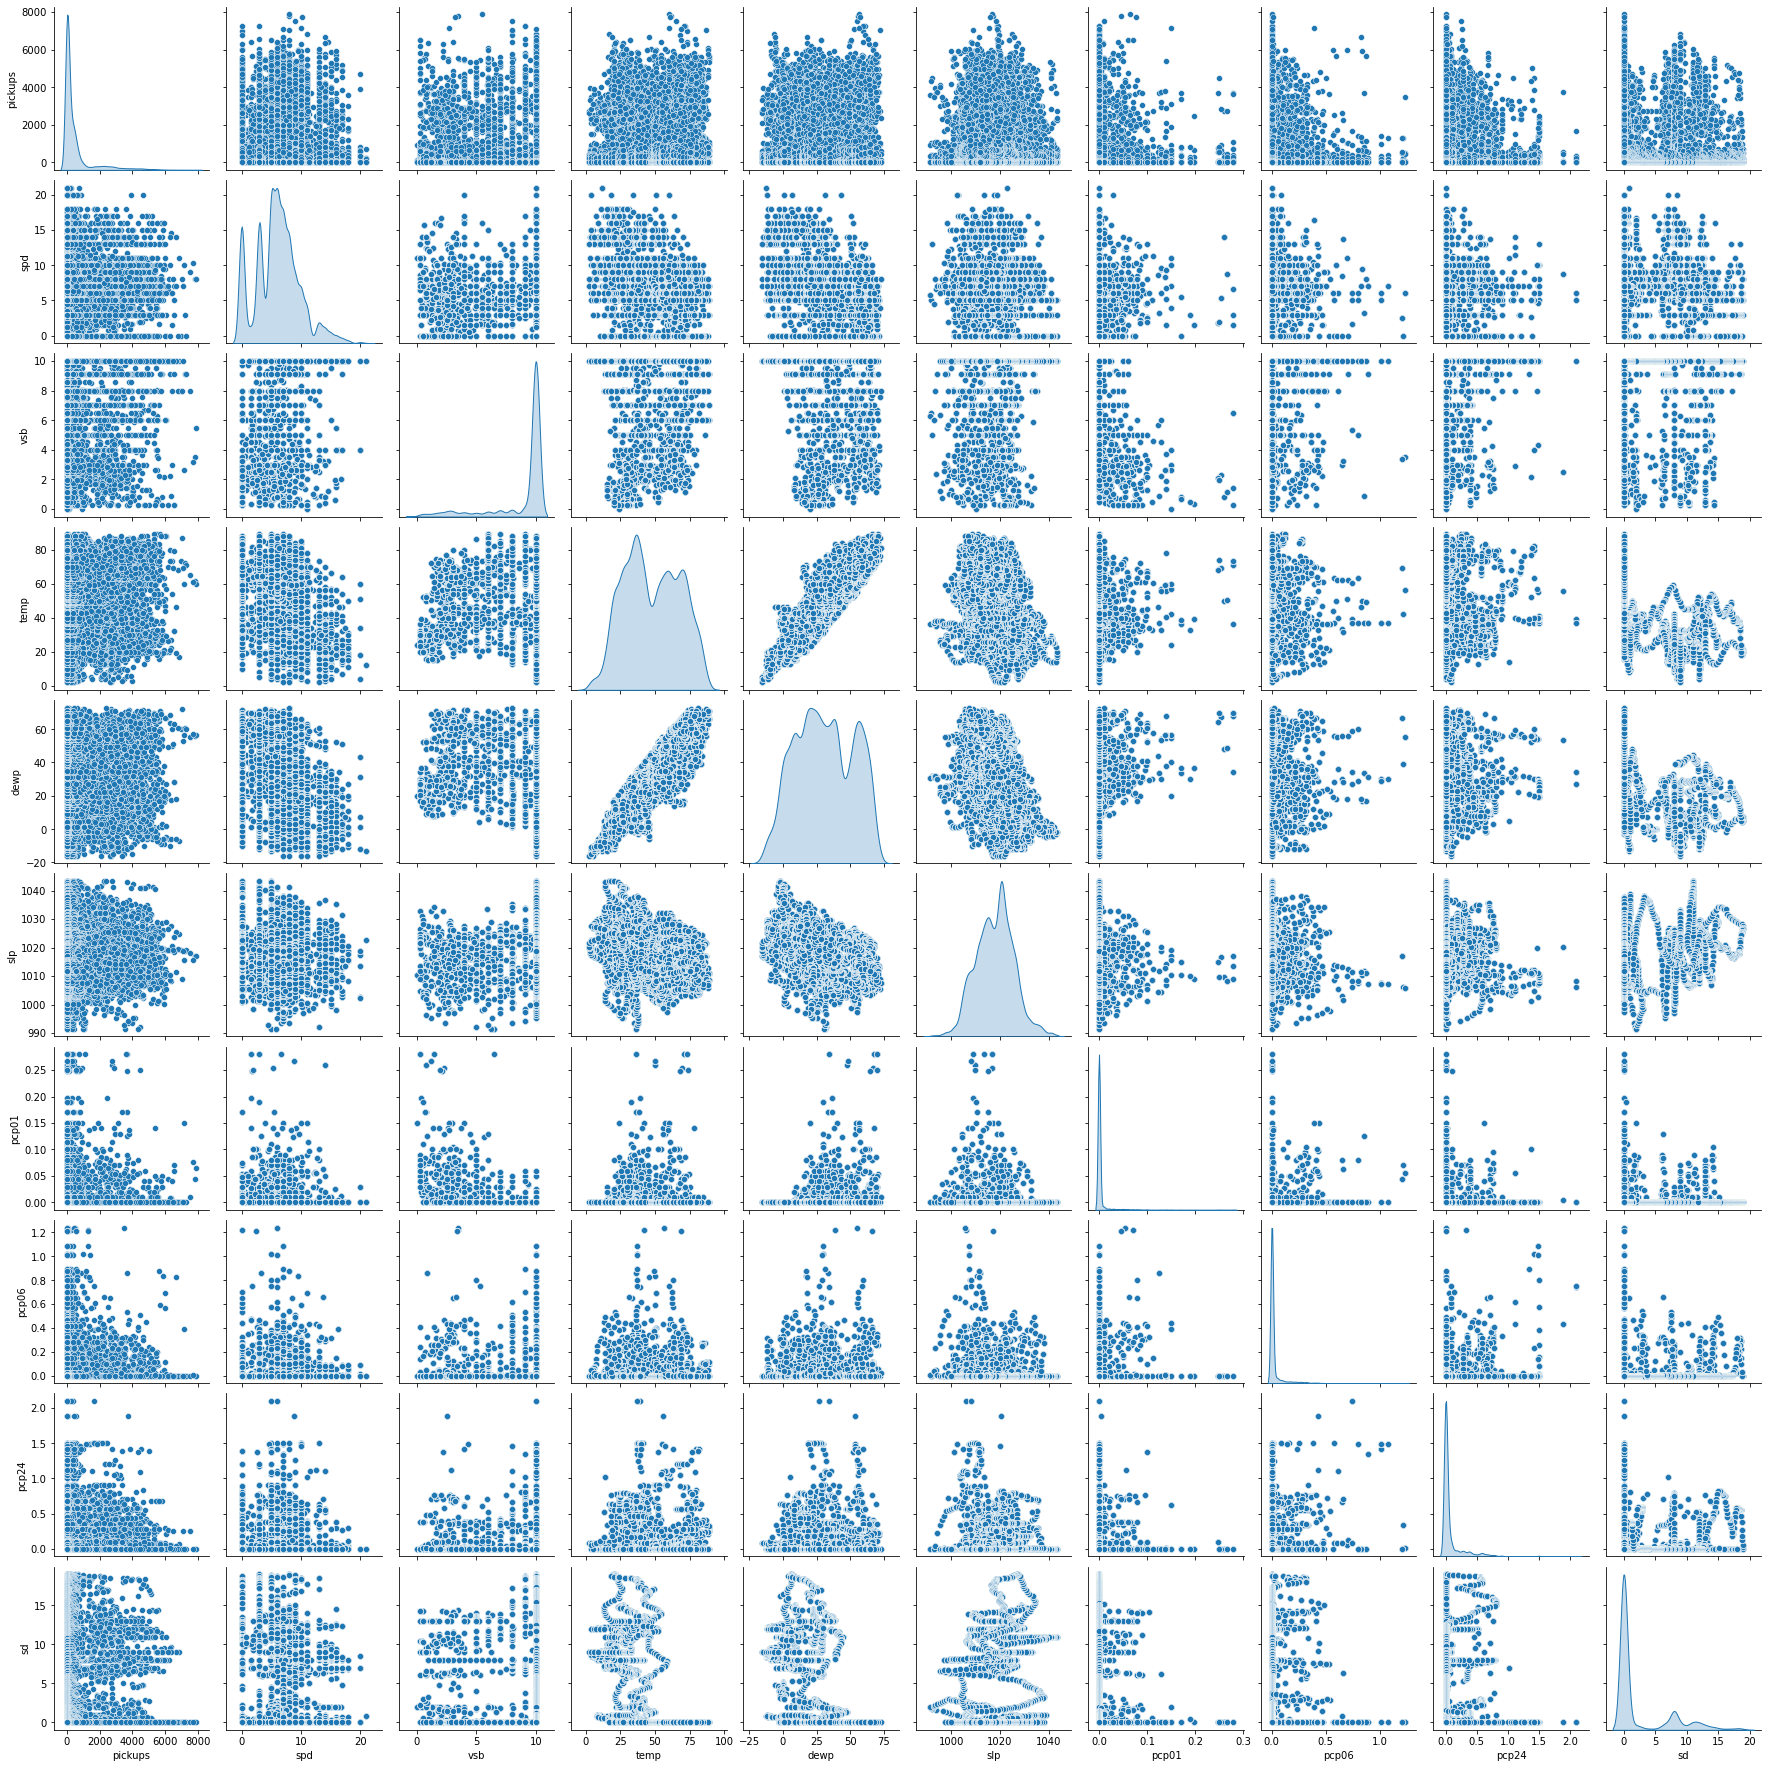

In [47]:
sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()

**Observations**
* We get the same insights as from the correlation plot
* There does not seem to be a strong relationship between number of pickups and weather stats

### Relationship between pickups and time based variables

#### Pickups across months

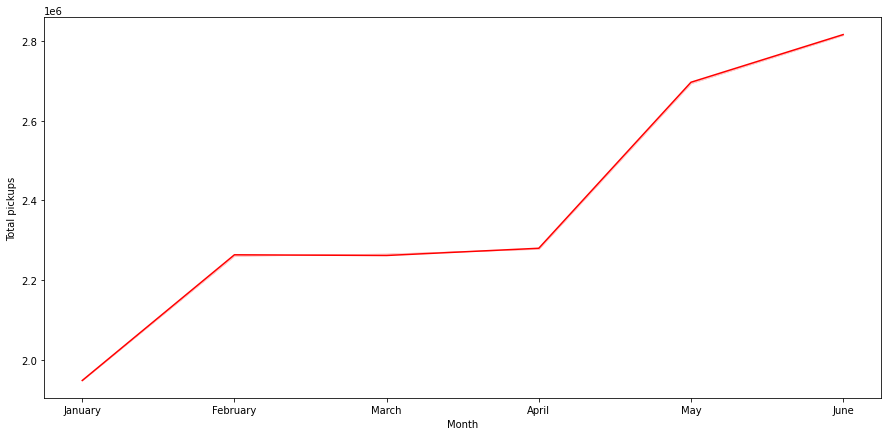

In [48]:
cats = df.start_month.unique().tolist()
df.start_month = pd.Categorical(df.start_month, ordered=True, categories=cats)

plt.figure(figsize=(15,7))
sns.lineplot(x="start_month", y="pickups",data=df,ci=0,color="RED",estimator='sum')
plt.ylabel('Total pickups')
plt.xlabel('Month')
plt.show()

**Observations**
* There is a clear increasing trend in monthly bookings
* Bookings in June are almost 1.5 times that of Jan

#### Pickups vs Days of the Month

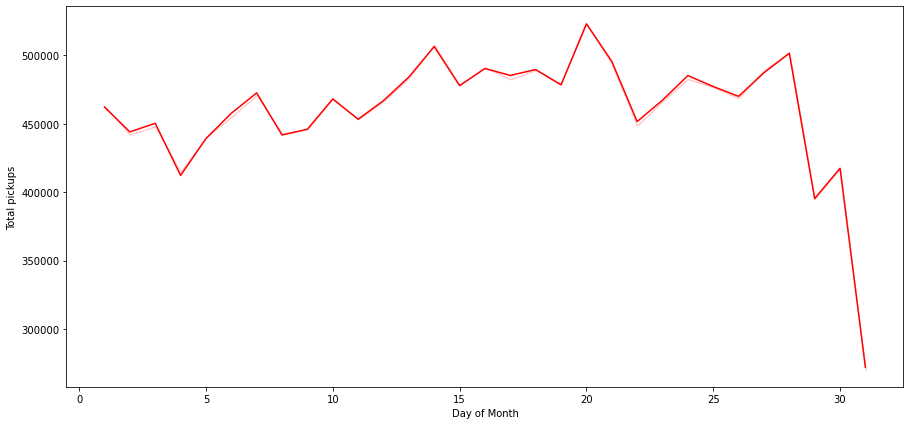

In [49]:
plt.figure(figsize=(15,7))
sns.lineplot(x="start_day", y="pickups",estimator='sum',ci=0,data=df,color="RED")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()

**Observations**
* There is a steep fall in the bookings on the last day of the month.
* This can partially be attributed to month of Feb having just 28 days. We can drop Feb and have a look at this chart again.
* There is a peak in the bookings around 20th day of month

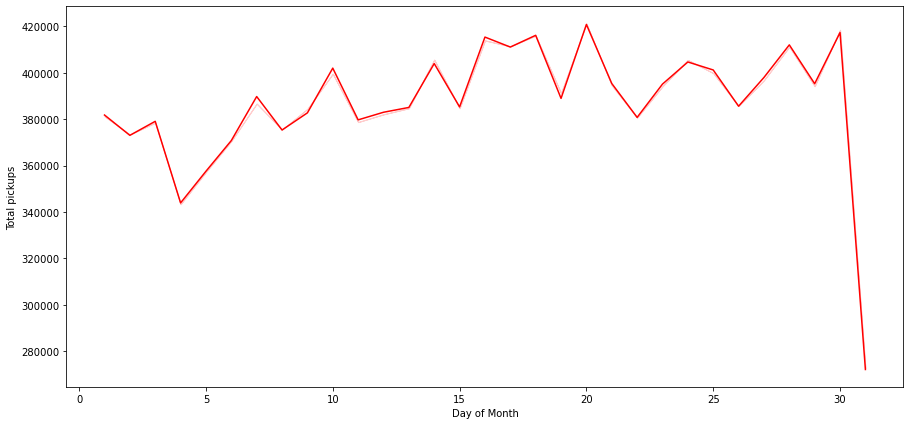

In [50]:
# lets us drop the feb month and see
df_not_feb =  df[df['start_month'] != 'February']
plt.figure(figsize=(15,7))
sns.lineplot(x="start_day", y="pickups",estimator='sum',ci=0,data=df_not_feb,color="RED")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()

**Observations**
* We see the expected increase in relative position of number of pickups on 29th to 30th
* Number of pickups for 31 is still low because not all months have the 31st day.

#### Pickups across Hour of Day

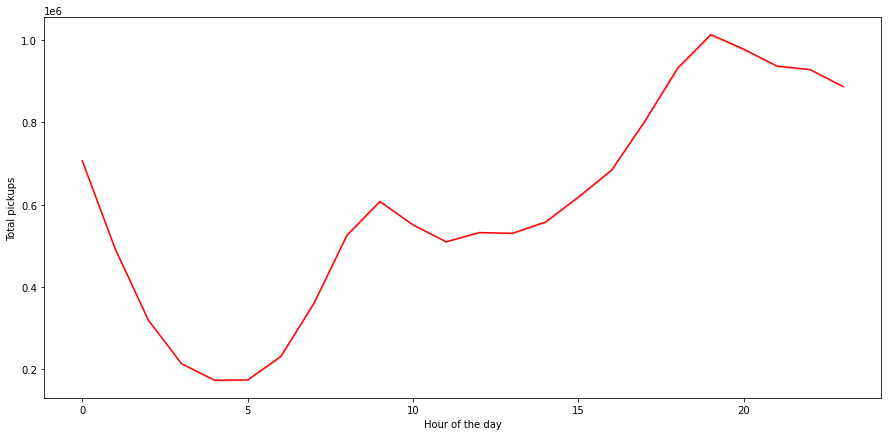

In [51]:
plt.figure(figsize=(15,7))
sns.lineplot(x="start_hour", y="pickups",estimator='sum',ci=0,data=df,color="RED")
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.show()

**Observations**
* Bookings peak around 19th and 20th hour of the day and decreases till 5 AM in the morning.
* The peak can be attributed to the time people leave their workplaces
* From 5 AM onwards, we can see an increasing trend till 10, possibly the office rush.
* Pickups then go down from 10AM to 12PM post which they start increasing.

#### Pickups across Weekdays

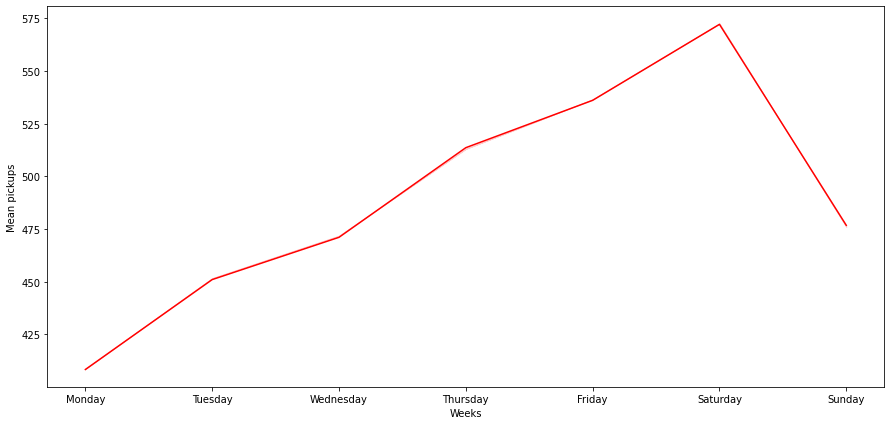

In [52]:
cats = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
df.week_day = pd.Categorical(df.week_day, ordered=True, categories=cats)

plt.figure(figsize=(15,7))
sns.lineplot(x="week_day", y="pickups",ci=0,data=df,color="RED")
plt.ylabel('Mean pickups')
plt.xlabel('Weeks')
plt.show()

**Observations**
* Pickups gradually increase as the week progresses and starts dropping down after Saturday.
* We need to do more investigation to understand why demand for Uber is low in the beginning of the week.

#### Pickups across Borough

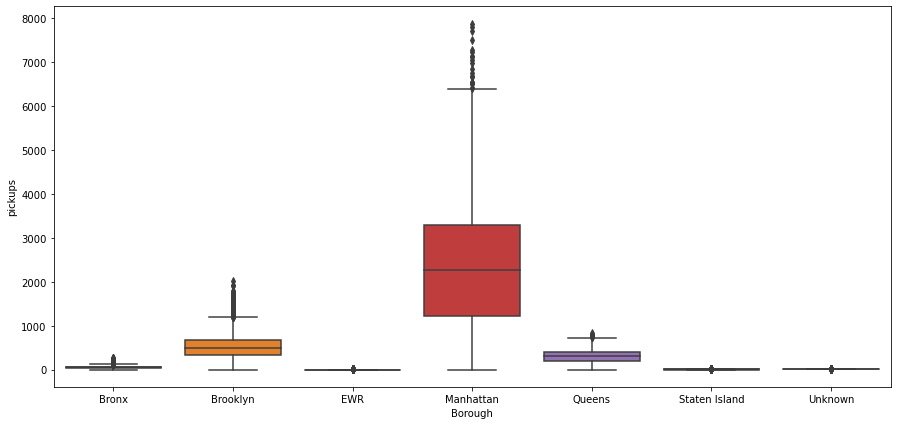

In [53]:
plt.figure(figsize=(15,7))           
sns.boxplot(df['borough'],df['pickups'])
plt.ylabel('pickups')
plt.xlabel('Borough')
plt.show()

**Observations**
* There is a clear difference in ridership across the different boroughs.
* Manhattan has the highest number of bookings
* Brooklyn and Queens are distant followers
* EWR, Unknown and Staten Island have very low number of bookings. The demand is so small that probably it can be covered by the drop-offs of the inbound trips from other areas.

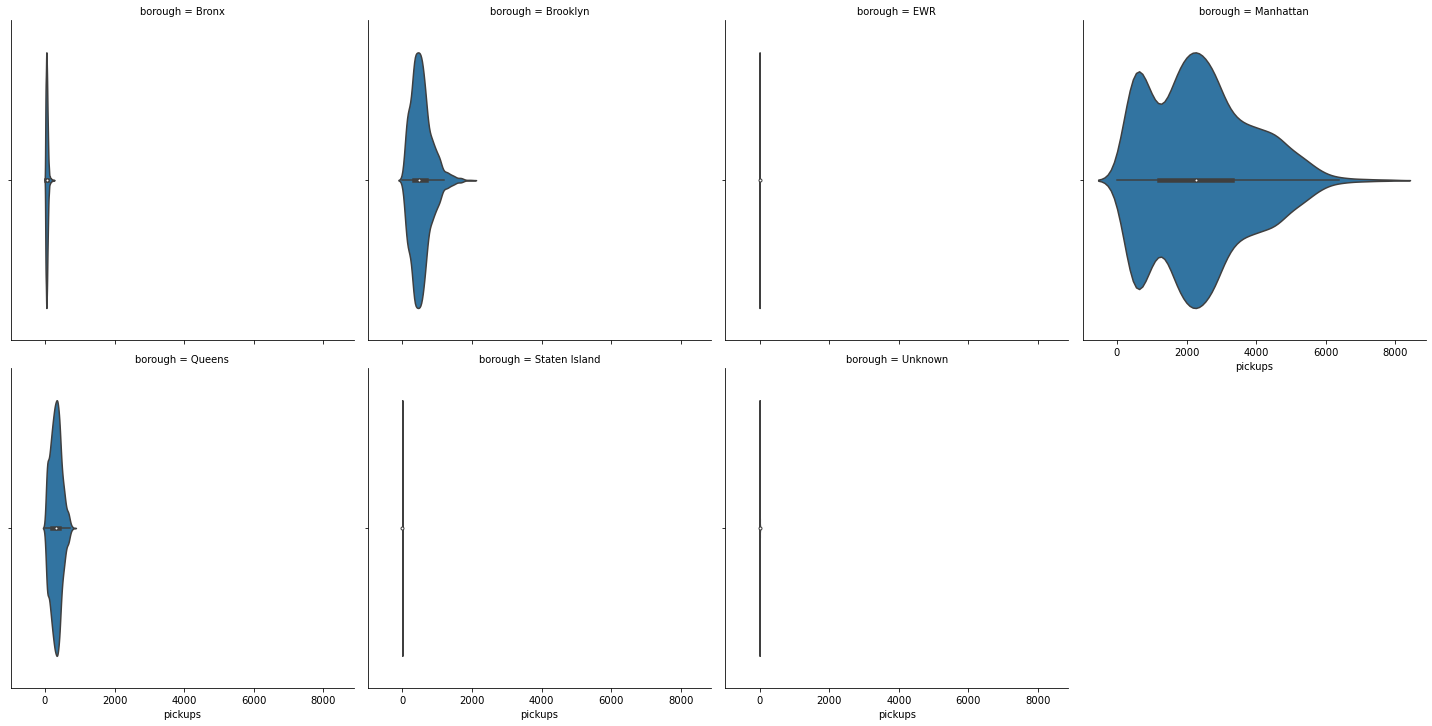

In [54]:
# Dispersion of pickups in every borough
sns.catplot(x='pickups',
             col='borough', 
             data=df,
             col_wrap=4,
             kind="violin")
plt.show()

**Observations**
* Manhattan and Brooklyn pickups' distribution is right skewed while Queens pickups distribution follows normal distribution.


#### Relationship between pickups and holidays

In [55]:
df.groupby('hday')['pickups'].mean()

hday
N    492.339957
Y    437.199822
Name: pickups, dtype: float64

In [56]:
# Check if the trend is similar across boroughs
df.groupby(by = ['borough','hday'])['pickups'].mean()

borough        hday
Bronx          N         50.771073
               Y         48.065868
Brooklyn       N        534.727969
               Y        527.011976
EWR            N          0.023467
               Y          0.041916
Manhattan      N       2401.302921
               Y       2035.928144
Queens         N        308.899904
               Y        320.730539
Staten Island  N          1.606082
               Y          1.497006
Unknown        N          2.057456
               Y          2.050420
Name: pickups, dtype: float64

**Observations**
1. The mean pickups on a holiday is lesser than a non-holiday.
2. In all the boroughs, except Manhattan, mean pickups on a holiday is very similar to a non holiday.
3. In Queens, mean pickups on a holiday are higher.
4. There are hardly any pickups in EWR.

## Multivariate Analysis

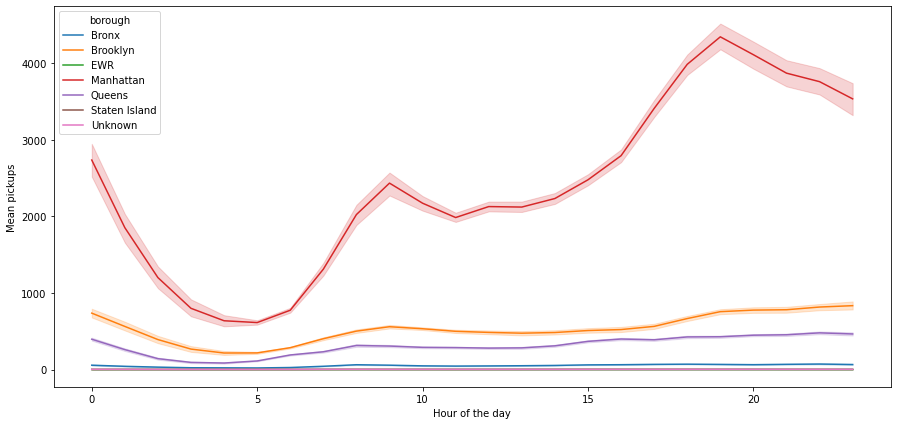

In [57]:
plt.figure(figsize=(15,7))
sns.lineplot(x="start_hour", y="pickups", ci=95, data=df, hue='borough')
plt.ylabel('Mean pickups')
plt.xlabel('Hour of the day')
plt.show()

* The number of pickups in Manhattan is very high and dominant when we see the spread across boroughs. 
* Let us try converting the pickups on a logarithmic scale.

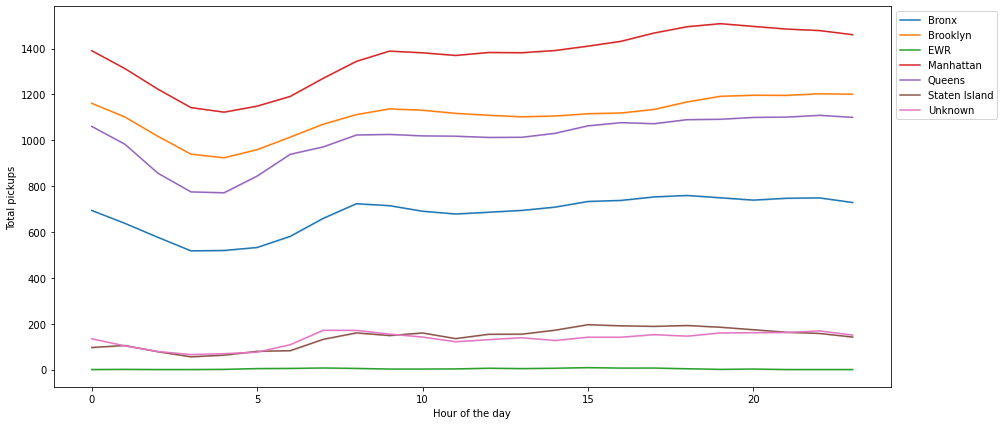

In [58]:
plt.figure(figsize=(15,7))
sns.lineplot(x=df.start_hour, y=np.log1p(df.pickups), estimator='sum', ci=0, hue=df.borough)
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

**Observations**
* Hourly pattern can be seen in all the boroughs. 
* After applying logarithmic scale, it is obvious that the 4 major boroughs follow the same pattern. 
* EWR seems to have a random demand with the majority of the values being zero with a few 1s and 2s.
* Borough and hour of the day combined could be good predictors of pickups.
* Manhattan sees the most Uber pickups. Let us explore this borough in more details.

#### Manhattan Pickups Heatmap - Weekday + Hour

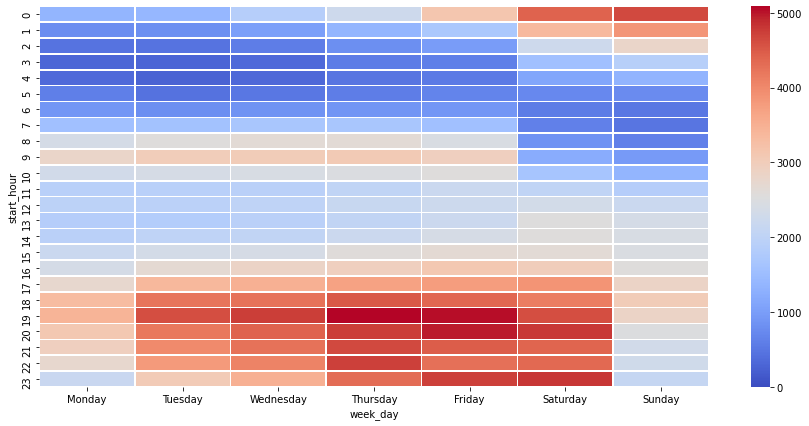

In [61]:
df_man = df[df.borough=='Manhattan']
df_hm =df_man.pivot_table(index = 'start_hour',columns ='week_day',values ='pickups')
# Draw a heatmap 
plt.figure(figsize = (15,7)) # To resize the plot
sns.heatmap(df_hm,  fmt="d", cmap='coolwarm', linewidths=.5, vmin=0)
plt.show()

**Observations**
* The demand for Uber peaks during the late hours of the day when people are returning home from office.
* Demand continues to be high during the late hours of the day (midnight) on Saturdays and Sundays.  
* It is odd that the demand of Uber is not as high on Monday evenings as compared to other working days.

### Let us see if a similar trend exists in Brooklyn

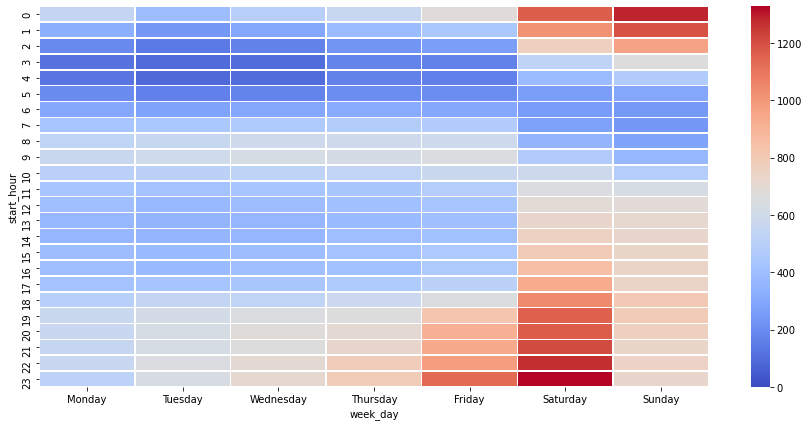

In [62]:
df_br = df[df.borough=='Brooklyn']
df_hm =df_br.pivot_table(index = 'start_hour',columns ='week_day',values ='pickups')
# Draw a heatmap 
plt.figure(figsize=(15,7)) # To resize the plot
sns.heatmap(df_hm,  fmt="d", cmap='coolwarm',linewidths=.5, vmin = 0)
plt.show()

* In Brooklyn, the trend of high Uber demand during the late hours of Fridays and Saturdays is less pronounced.

**Let's have a quick final overview of the data using the pandas profiling library.**

In [63]:
# let us try pandas-profiling now and see how does it simplifies the EDA
# !pip install pandas-profiling==2.8.0

In [ ]:
from pandas_profiling import ProfileReport
# Use the original dataframe, so that original features are considered
prof = ProfileReport(data)
# to view report created by pandas profile
prof

In [65]:
# to save report obtained via pandas profiling
prof.to_file(output_file='output.html')

# **Conclusion and Recommendations**

## Conclusion

We analyzed a dataset of nearly 30K hourly Uber pickup information, from New York boroughs.
The data spanned every day of the first six months of the year 2015.
The main feature of interest here is the number of pickups. 
Both from an environmental and business perspective, having cars roaming in an area while the demand is in another or filling the streets with cars during a low demand period while lacking during peak hours is inefficient. Thus we determined the factors that affect pickup and the nature of their effect.

We have been able to conclude that 

1. Uber cabs are most popular in the Manhattan area of New York.
2. Contrary to intuition, weather conditions do not have much impact on the number of Uber pickups.
3. The demand for Uber has been increasing steadily over the months (Jan to June).
4. The rate of pickups is higher on the weekends as compared to weekdays.
5. It is encouraging to see that New Yorkers trust Uber taxi services when they step out to enjoy their evenings.
6. We can also conclude that people use Uber for regular office commutes. The demand steadily increases from 6 AM to 10 AM, then declines a little and starts picking up till midnight. The demand peaks at 7-8 PM.
7. We need to further investigate the low demand for Uber on Mondays.


## Recommendation to business

1. Manhattan is the most mature market for Uber. Brooklyn, Queens, and Bronx show potential. 
2. There has been a gradual increase in Uber rides over the last few months and we need to keep up the momentum.
3. Riderships are high at peak office commute hours on weekdays and during late evenings on Saturdays. Cab availability must be ensured during these times.
4. The demand for cabs is highest on Saturday nights. Cab availability must be ensured during this time of the week.
5. Procure data for fleet size availability to get a better understanding of the demand-supply status and build a machine learning model to accurately predict pickups per hour, to optimize the cab fleet in respective areas.
6. Procure more data on price and build a model that can predict optimal pricing.

##  Further Analysis

1. Dig deeper to explore the variation of cab demand, during working days and non-working days. You can combine Weekends+Holidays to be non-working days and weekdays to be the working days.
2. Drop the boroughs that have negligible pickups and then analyze the data to uncover more insights.